### **3.2.1 生成数据集**

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [4]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    # print(X.shape, X)
    # print(y.shape, y)
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [16]:
# i = torch.ones((1000, 2), dtype=torch.float)
# j = torch.tensor([2, 3], dtype=torch.float)
# i.shape, j.shape
# k = torch.matmul(i, j)
# k.shape

In [17]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.8334, -0.0272]) 
label: tensor([2.6312])


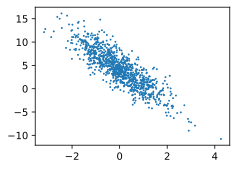

In [18]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

### **3.2.2 读取数据集**

In [28]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [29]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0563,  1.8317],
        [ 0.1274, -1.1115],
        [-0.7833, -0.2332],
        [-0.4207,  0.9781],
        [ 1.2873,  1.4495],
        [ 1.3036, -0.4879],
        [-0.1824, -1.4400],
        [-0.5534,  1.0103],
        [-0.2244, -0.0130],
        [-0.5336,  0.2278]]) 
 tensor([[ 0.0837],
        [ 8.2486],
        [ 3.4329],
        [ 0.0361],
        [ 1.8539],
        [ 8.4513],
        [ 8.7415],
        [-0.3586],
        [ 3.7846],
        [ 2.3555]])


### **3.2.3 初始化模型参数**